# Principal component analysis (PCA).

## Perform Principal component analysis and perform clustering using first 
## 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
## optimum number of clusters and check whether we have obtained same number of clusters with the original data 
## (class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
wine = pd.read_csv("D:/PCA Assignment/wine.csv")

In [3]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
print(wine["Type"].value_counts())

2    71
1    59
3    48
Name: Type, dtype: int64


In [5]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
wine.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
wine["Type"].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [9]:
# Considering only numerical data 
wine = wine.iloc[:,1:]
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
# Normalizing the numerical data 
std = StandardScaler()
wine_normal=std.fit_transform(wine)
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [11]:
pca2=PCA(n_components=6)
pca_components=pd.DataFrame(pca2.fit_transform(wine_normal),columns=['a','b','c','d','e','f'])
pca_components.head(10)

,a,b,c,d,e,f
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392


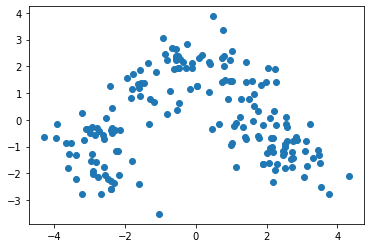

In [12]:
plt.scatter(pca_components.a,pca_components.b)                   # The PCA components are 

### Component Matrix

In [13]:
pca_components

,a,b,c,d,e,f
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783


### Amount of each Variance of each PCA

In [14]:
pca2.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823])

### Cummalative variance of each PCA

In [15]:
var=np.cumsum(np.round(pca2.explained_variance_ratio_,4)*100)

### variance Plot for PCA components obtained

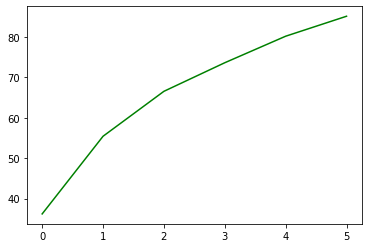

In [16]:
plt.plot(var,color='green')

In [17]:
x=wine_normal[:,0:1]
y=wine_normal[:,1:2]
z=wine_normal[:,2:3]

In [18]:
x

array([[ 1.51861254],
       [ 0.24628963],
       [ 0.19687903],
       [ 1.69154964],
       [ 0.29570023],
       [ 1.48155459],
       [ 1.71625494],
       [ 1.3086175 ],
       [ 2.25977152],
       [ 1.0615645 ],
       [ 1.3580281 ],
       [ 1.38273339],
       [ 0.92568536],
       [ 2.16095032],
       [ 1.70390229],
       [ 0.77745356],
       [ 1.60508109],
       [ 1.02450655],
       [ 1.46920194],
       [ 0.78980621],
       [ 1.3086175 ],
       [-0.08723191],
       [ 0.87627476],
       [-0.18605311],
       [ 0.61686912],
       [ 0.06099988],
       [ 0.48098997],
       [ 0.36981612],
       [ 1.07391715],
       [ 1.2592069 ],
       [ 0.90098006],
       [ 0.71569031],
       [ 0.83921681],
       [ 0.93803801],
       [ 0.62922177],
       [ 0.59216382],
       [ 0.34511082],
       [ 0.06099988],
       [ 0.08570518],
       [ 1.50625989],
       [ 0.69098501],
       [ 0.50569527],
       [ 1.0862698 ],
       [ 0.29570023],
       [ 0.06099988],
       [ 1

In [19]:
y

array([[-0.5622498 ],
       [-0.49941338],
       [ 0.02123125],
       [-0.34681064],
       [ 0.22769377],
       [-0.51736664],
       [-0.4186237 ],
       [-0.16727801],
       [-0.62508622],
       [-0.88540853],
       [-0.15830138],
       [-0.76871232],
       [-0.54429654],
       [-0.54429654],
       [-0.4186237 ],
       [-0.47248348],
       [-0.37374054],
       [-0.68792264],
       [-0.66996938],
       [ 0.68550197],
       [-0.63406285],
       [ 1.31386618],
       [-0.42760033],
       [-0.66099274],
       [-0.47248348],
       [-0.25704433],
       [-0.50839001],
       [-0.55327317],
       [-0.3916938 ],
       [-0.58917969],
       [-0.75075906],
       [-0.60713296],
       [-0.45453022],
       [-0.72382916],
       [-0.48146012],
       [-0.47248348],
       [-0.62508622],
       [-0.61610959],
       [-0.75075906],
       [ 1.48442217],
       [-0.5622498 ],
       [ 1.3497727 ],
       [-0.40067043],
       [ 1.47544554],
       [-0.50839001],
       [ 1

In [20]:
z

array([[ 0.23205254],
       [-0.82799632],
       [ 1.10933436],
       [ 0.4879264 ],
       [ 1.84040254],
       [ 0.30515936],
       [ 0.30515936],
       [ 0.89001391],
       [-0.7183361 ],
       [-0.352802  ],
       [-0.24314178],
       [-0.17003496],
       [ 0.15894572],
       [ 0.0858389 ],
       [ 0.0492855 ],
       [ 1.21899459],
       [ 1.29210141],
       [ 0.92656731],
       [ 0.41481959],
       [ 0.70724686],
       [-0.3162486 ],
       [ 1.03622754],
       [-0.02382132],
       [ 0.56103322],
       [ 0.89001391],
       [ 3.11977186],
       [ 0.92656731],
       [-0.82799632],
       [ 1.58452868],
       [-0.57212246],
       [ 1.21899459],
       [-0.02382132],
       [-0.02382132],
       [ 1.21899459],
       [ 1.03622754],
       [ 0.15894572],
       [ 1.73074231],
       [ 0.67069345],
       [-0.97420996],
       [ 0.52447981],
       [-0.20658837],
       [-0.90110314],
       [ 0.81690709],
       [-0.27969519],
       [-0.97420996],
       [ 0

In [21]:
wine1=pd.DataFrame(x,columns=['pca1'])

In [22]:
wine1

,pca1
0,1.518613
1,0.246290
2,0.196879
3,1.691550
4,0.295700
...,...
173,0.876275
174,0.493343
175,0.332758
176,0.209232


In [23]:
wine1['pca2']=y
wine1['pca3']=z
wine1

,pca1,pca2,pca3
0,1.518613,-0.562250,0.232053
1,0.246290,-0.499413,-0.827996
2,0.196879,0.021231,1.109334
3,1.691550,-0.346811,0.487926
4,0.295700,0.227694,1.840403
...,...,...,...
173,0.876275,2.974543,0.305159
174,0.493343,1.412609,0.414820
175,0.332758,1.744744,-0.389355
176,0.209232,0.227694,0.012732


### Visualization of PCA's

C:\Users\Vaibhav Kinge\AppData\Local\Temp\ipykernel_8336\2659704868.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(10,10)).gca(projection='3d')


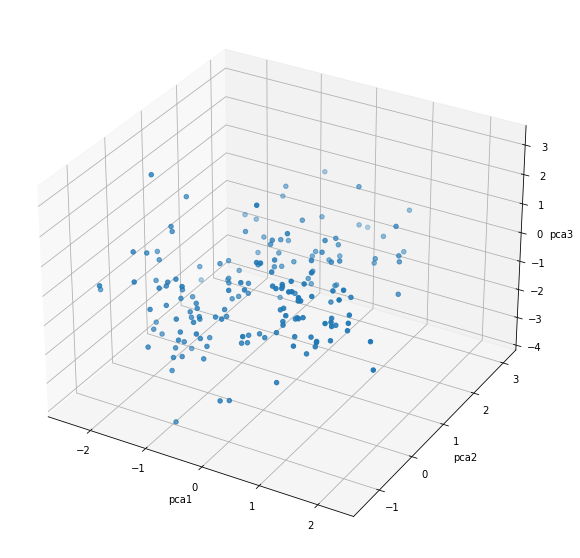

In [24]:
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
ax.scatter (xs=x,ys=y,zs=z)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')
plt.show()

In [25]:
import seaborn as sn

<AxesSubplot:>

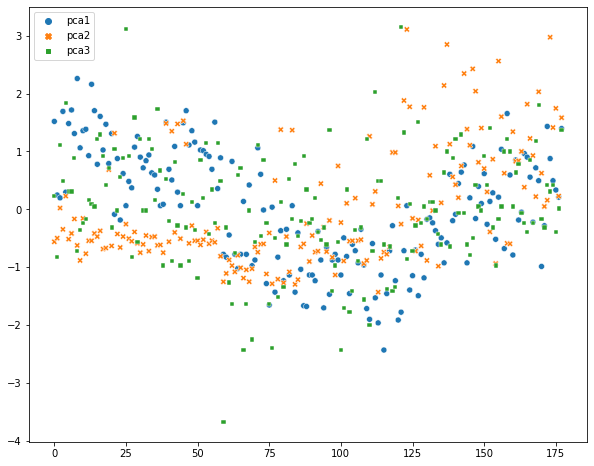

In [26]:
fig=plt.figure(figsize=(10,8))
sn.scatterplot(data=wine1)

## check for other cluster algorithms


 # Hierarchical

In [27]:
import scipy.cluster.hierarchy as sch

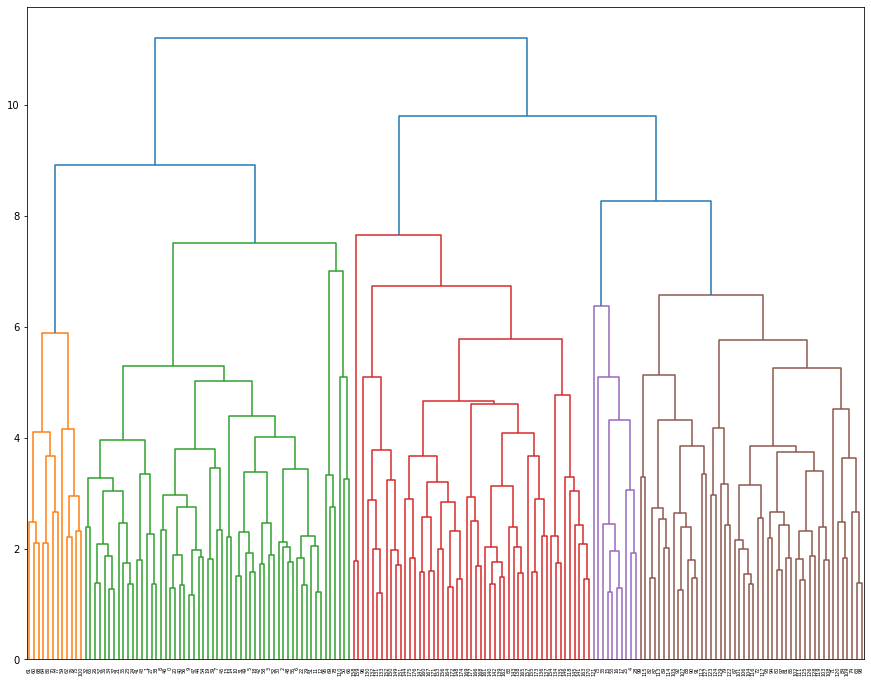

In [28]:
#Creating Dendrogram
plt.figure(figsize=(15,12))
dendrogram=sch.dendrogram(sch.linkage(wine_normal,'complete'))

In [29]:
# Creating Clusters (y)
from sklearn.cluster import AgglomerativeClustering


In [30]:
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters


AgglomerativeClustering(n_clusters=3)

In [31]:
AgglomerativeClustering(n_clusters=3)


AgglomerativeClustering(n_clusters=3)

In [32]:
y=pd.DataFrame(hclusters.fit_predict(wine_normal),columns=['clustersid'])
y['clustersid'].value_counts()

2    64
0    58
1    56
Name: clustersid, dtype: int64

In [33]:
# Adding Clusters for Dataset
wine2=wine.copy()

In [34]:
wine2['clustersid']=hclusters.labels_

In [35]:
wine2

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clustersid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


## K-Means

In [36]:
# Import Libraries
from sklearn.cluster import KMeans


### within-cluster sum-of-squares criterion

In [37]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
    kmeans.fit(wine) 
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


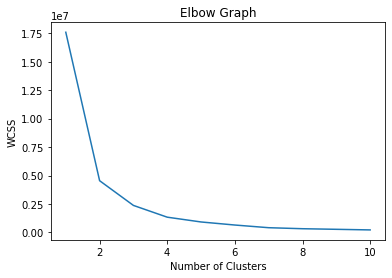

In [38]:
# plot k value range vs wcss to get elbow graph for choosing k(no.of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(wine_normal)

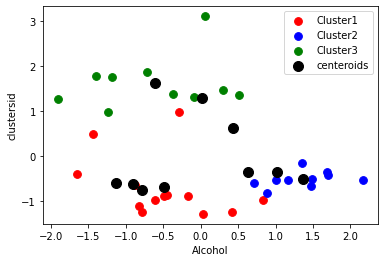

In [40]:
plt.scatter(wine_normal[y_kmeans == 0, 0], wine_normal[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(wine_normal[y_kmeans == 1, 0], wine_normal[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(wine_normal[y_kmeans == 2, 0], wine_normal[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'centeroids')
plt.xlabel('Alcohol')
plt.ylabel('clustersid') 
plt.legend() 

plt.show()

In [41]:
clusters3=KMeans(3,random_state=42).fit(wine_normal)

In [42]:
clusters3

KMeans(n_clusters=3, random_state=42)

In [43]:
clusters3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

### Assigning Clusters to the Dataset

In [44]:
wine3=wine.copy()

In [47]:
wine3['clusters3id']=clusters3.labels_

In [49]:
wine3

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters3id
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [48]:
wine3['clusters3id'].value_counts()

2    65
1    62
0    51
Name: clusters3id, dtype: int64